# Suplementary figure 3: Cell abundanes by spatial slide (cytoSPACE)

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from collections import Counter
import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import counts_major_cell_by_region 
plt.rcParams['font.family'] = 'FreeSans' 
import pickle
title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

# Version 1 of the plot: Counts split by region

In [6]:
type2color_AVN = pickle.load(open('colors/type2color_AVN.pkl', 'rb'))
spatialfile_AVN = global_path + 'Data/Heart/visium-OCT_AVN_lognormalised_A61_ST11.h5ad'
adatafile_AVN = global_path + 'Data/Heart/Global_lognormalised_AVN_A61.h5ad'
cytofile_AVN = global_path + 'Results/Heart/CytoSPACE/AVN/assigned_locations.csv'
cols = ['cell_state', 'cell_type']
plot_df_AVN, p_c2l_AVN = counts_major_cell_by_region(spatialfile_AVN, adatafile_AVN, cytofile_AVN, type2color_AVN, cols)
    


type2color_SAN = pickle.load(open('colors/type2color_SAN.pkl', 'rb'))
spatialfile_SAN = global_path + 'Data/Heart/visium-OCT_SAN_lognormalised_AH1.h5ad'
adatafile_SAN = global_path + 'Data/Heart/Global_lognormalised_SAN_AH1.h5ad'
cytofile_SAN = global_path + 'Results/Heart/CytoSPACE/SAN/assigned_locations.csv'
cols = ['cell_state', 'cell_type']
plot_df_SAN, p_c2l_SAN = counts_major_cell_by_region(spatialfile_SAN, adatafile_SAN, cytofile_SAN, type2color_SAN, cols)


In [4]:
### To add the cell type that is not present in the SAN data
plot_df_SAN = pd.concat([plot_df_SAN, pd.DataFrame({'Region': plot_df_SAN.Region.unique(), 
              'CellType': ['Ventricular Cardiomyocyte']*len(plot_df_SAN.Region.unique()), 
              'Count': [0]*len(plot_df_SAN.Region.unique())})])

## Other the cell types to have them in the same order in the plot: 
plot_df_SAN = plot_df_SAN.sort_values(by = 'CellType')
plot_df_AVN = plot_df_AVN.sort_values(by = 'CellType')

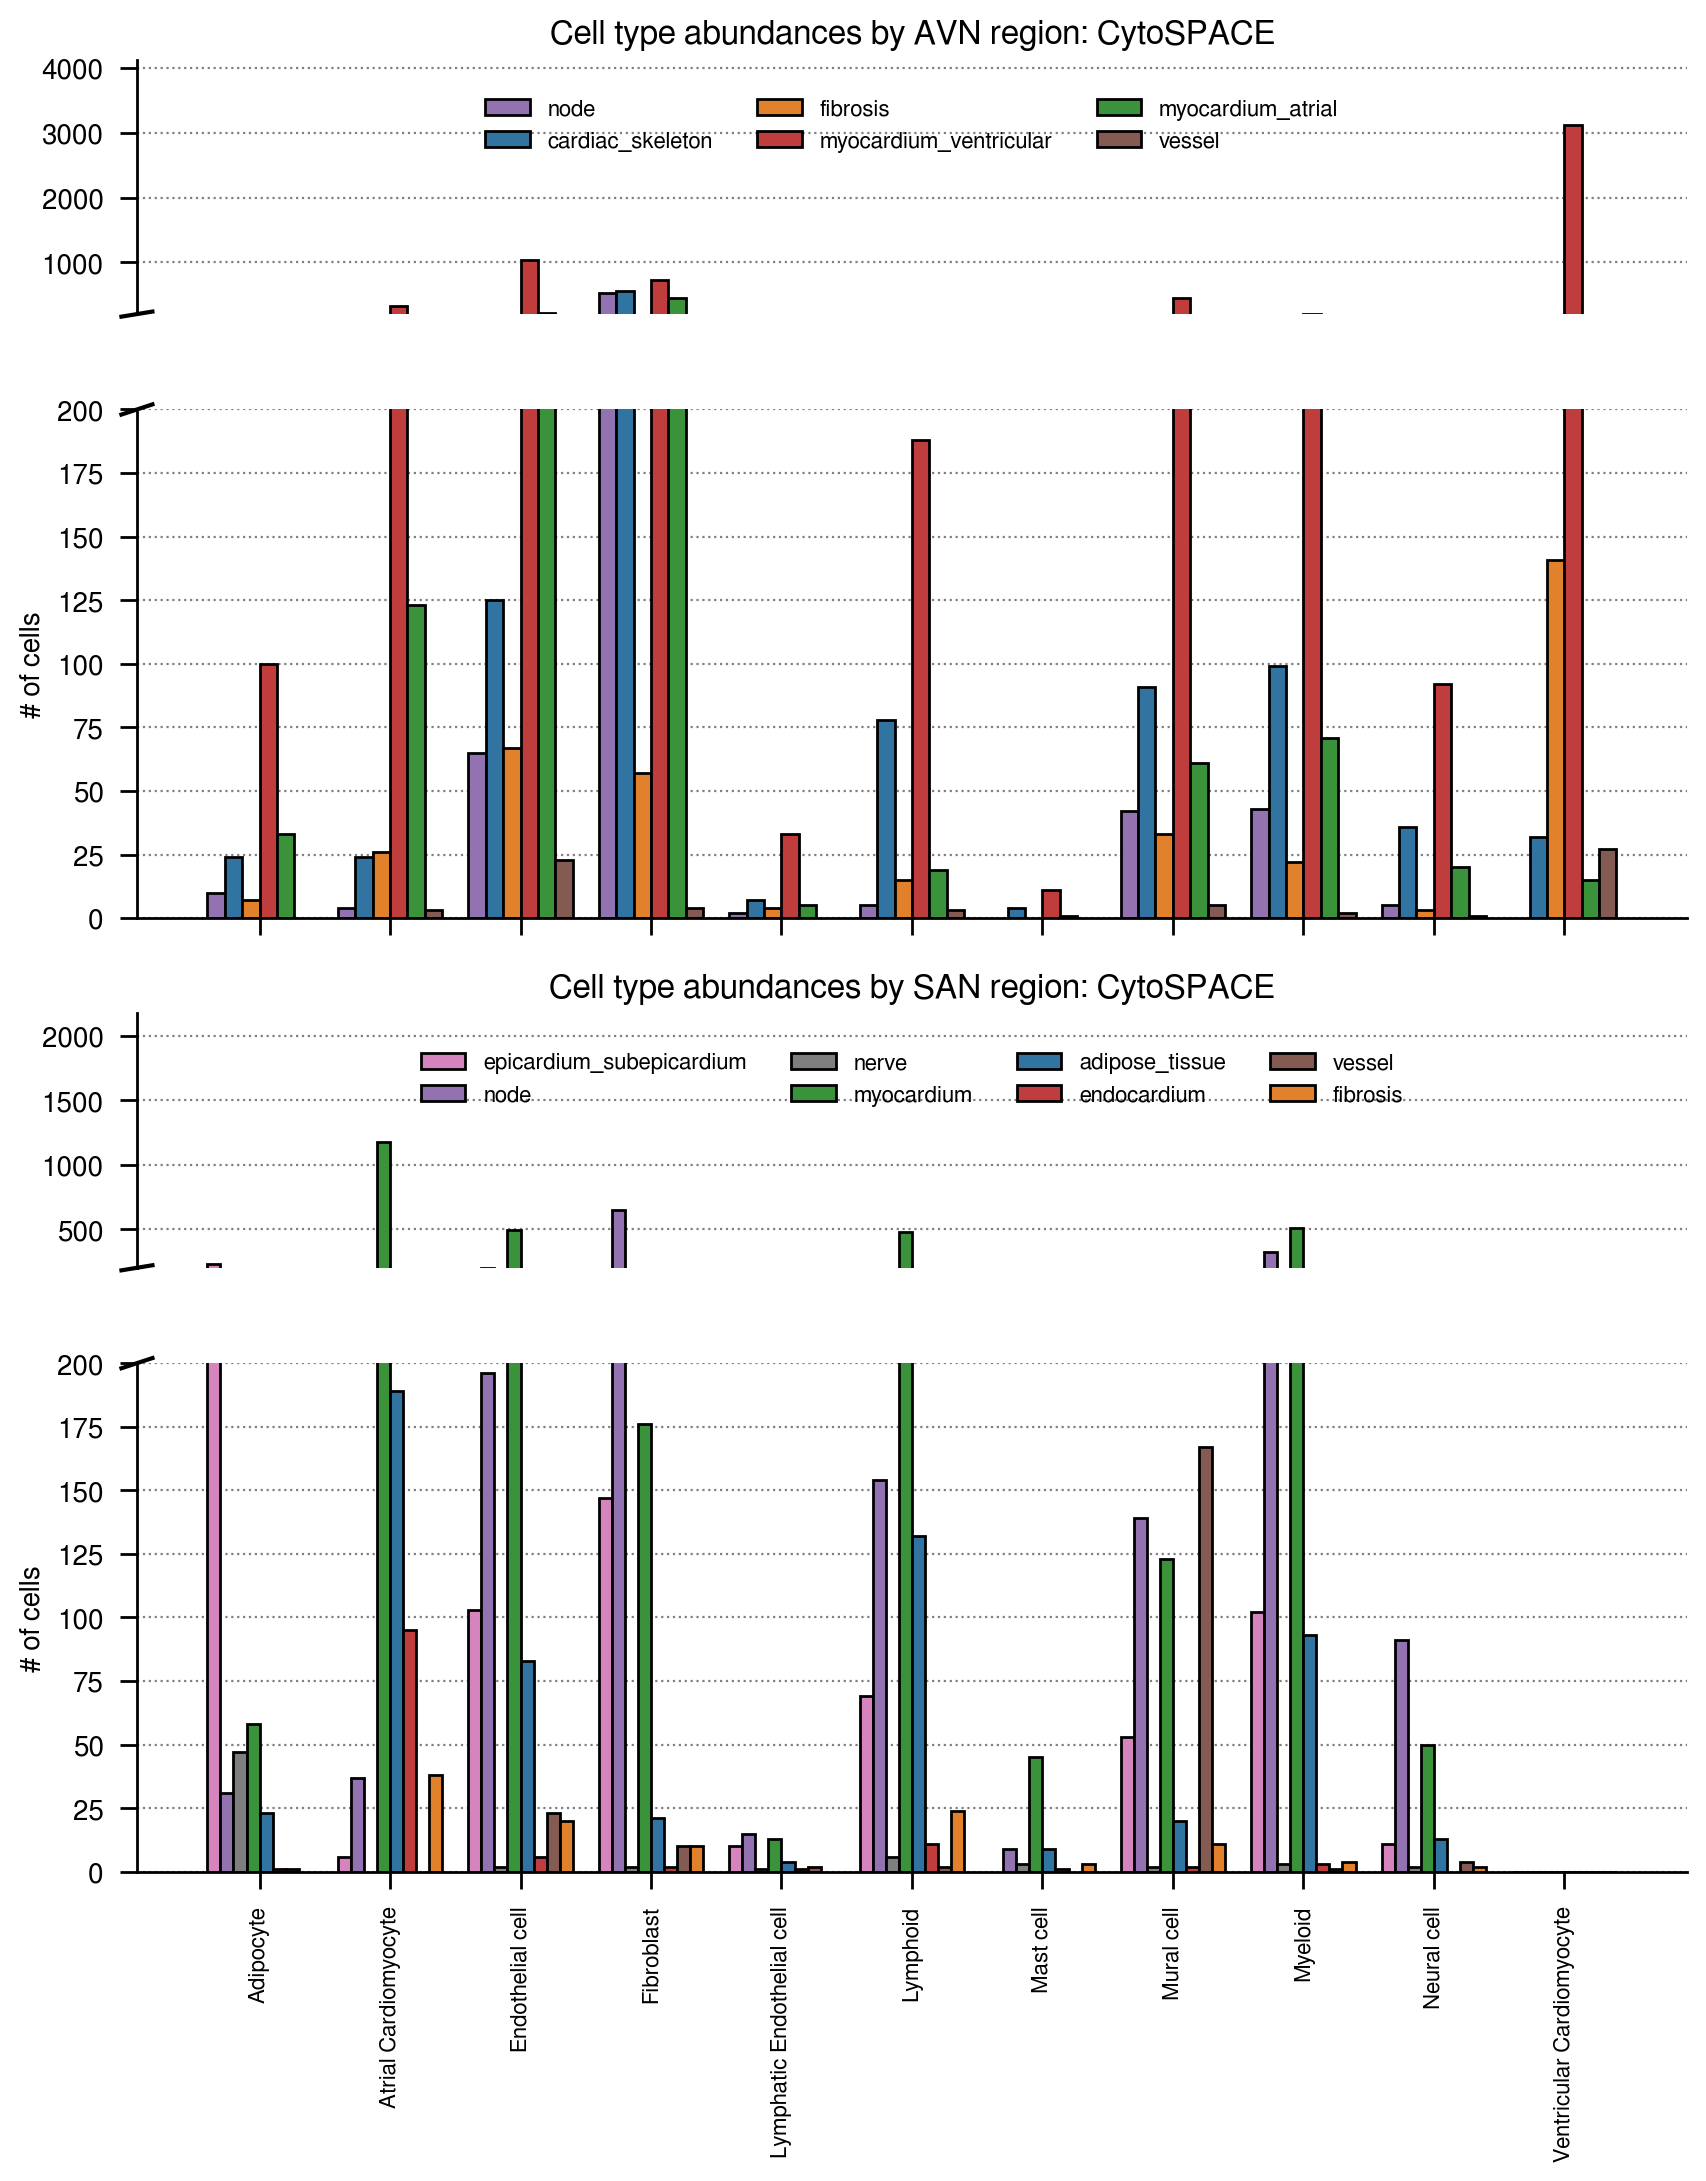

In [5]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(10, 12), dpi=200, gridspec_kw={'height_ratios': [1, 2, 1, 2], 'hspace': 0.25})

# Plot on each subplot
bars_top = sns.barplot(data=plot_df_AVN, x='CellType', y='Count', hue='Region', ax=ax, palette=type2color_AVN, edgecolor='black')
bars_bottom = sns.barplot(data=plot_df_AVN, x='CellType', y='Count', hue='Region', ax=ax2, palette=type2color_AVN, edgecolor='black')

# Set the limits for the y-axis on each subplot to create the break effect
ax.set_ylim(200, plot_df_AVN['Count'].max() + 1000)  # Upper part
ax2.set_ylim(0, 200)  # Lower part

## despine function remove the top and right spines from the plot
sns.despine(ax=ax2)
## bottom=True specifies that you want to also remove this spine
sns.despine(ax=ax, bottom=True)

# Adding diagonal lines to indicate the break in axis
d = .01  # How big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

# Adjustments and labels
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', bottom=False)
ax.set_ylabel('')
ax.grid(axis='y', linestyle=':', color='gray', zorder=0)
ax.set_title('Cell type abundances by AVN region: CytoSPACE', fontsize=title_size)
ax2.legend(title='', loc='upper center',bbox_to_anchor=(0.5, 1.65), ncol=3, frameon=False, fontsize=label_size)


ax.legend_.remove()
ax2.set_xticklabels('')
ax2.set_ylabel('# of cells', fontsize=labelout_size)
ax2.set_xlabel('')
ax2.grid(axis='y', linestyle=':', color='gray', zorder=0)

# Iterate on the different bars and put them on top of the grid
for bar in bars_top.patches:
    bar.set_zorder(2)

for bar in bars_bottom.patches:
    bar.set_zorder(2)


# # Seccond plot
bars_top2 = sns.barplot(data=plot_df_SAN, x='CellType', y='Count', hue='Region', ax=ax3, palette=type2color_SAN, edgecolor='black')
bars_bottom2 = sns.barplot(data=plot_df_SAN, x='CellType', y='Count', hue='Region', ax=ax4, palette=type2color_SAN, edgecolor='black')

# Set the limits for the y-axis on each subplot to create the break effect
ax3.set_ylim(200, plot_df_SAN['Count'].max() + 1000)  # Upper part
ax4.set_ylim(0, 200)  # Lower part

## despine function remove the top and right spines from the plot
sns.despine(ax=ax4)
## bottom=True specifies that you want to also remove this spine
sns.despine(ax=ax3, bottom=True)

# Adding diagonal lines to indicate the break in axis
d = .01  # How big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
kwargs.update(transform=ax4.transAxes)  # Switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

# Adjustments and labels
ax3.set_xlabel('')
ax3.tick_params(axis='x', which='both', bottom=False)
ax3.set_ylabel('')
ax3.grid(axis='y', linestyle=':', color='gray', zorder=0)
ax3.set_title('Cell type abundances by SAN region: CytoSPACE', fontsize=title_size)
ax4.legend(title='', loc='upper center',bbox_to_anchor=(0.5, 1.65), ncol=4, frameon=False, fontsize=label_size)

ax3.legend_.remove()
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90, fontsize=label_size)
ax4.set_ylabel('# of cells', fontsize=labelout_size)
ax4.set_xlabel('')
ax4.grid(axis='y', linestyle=':', color='gray', zorder=0)

# Iterate on the different bars and put them on top of the grid
for bar in bars_top2.patches:
    bar.set_zorder(2)

for bar in bars_bottom2.patches:
    bar.set_zorder(2)



# Version 2: One plot with both slides (do not split by region)

In [8]:
files = [[spatialfile_AVN, adatafile_AVN, cytofile_AVN, type2color_AVN], 
         [spatialfile_SAN, adatafile_SAN, cytofile_SAN, type2color_SAN]]
cell_counts = []
for i in files: 
    cell_counts.append(counts_major_cell_by_region(i[0], i[1], i[2], i[3], cols, region=False))

df_cell_counts = pd.DataFrame(cell_counts).T
df_cell_counts.columns = ['AVN', 'SAN'] 

In [10]:
df_cell_counts = df_cell_counts.reset_index().melt(id_vars='index', var_name='region', value_name='Count')
df_cell_counts = df_cell_counts.sort_values('index')

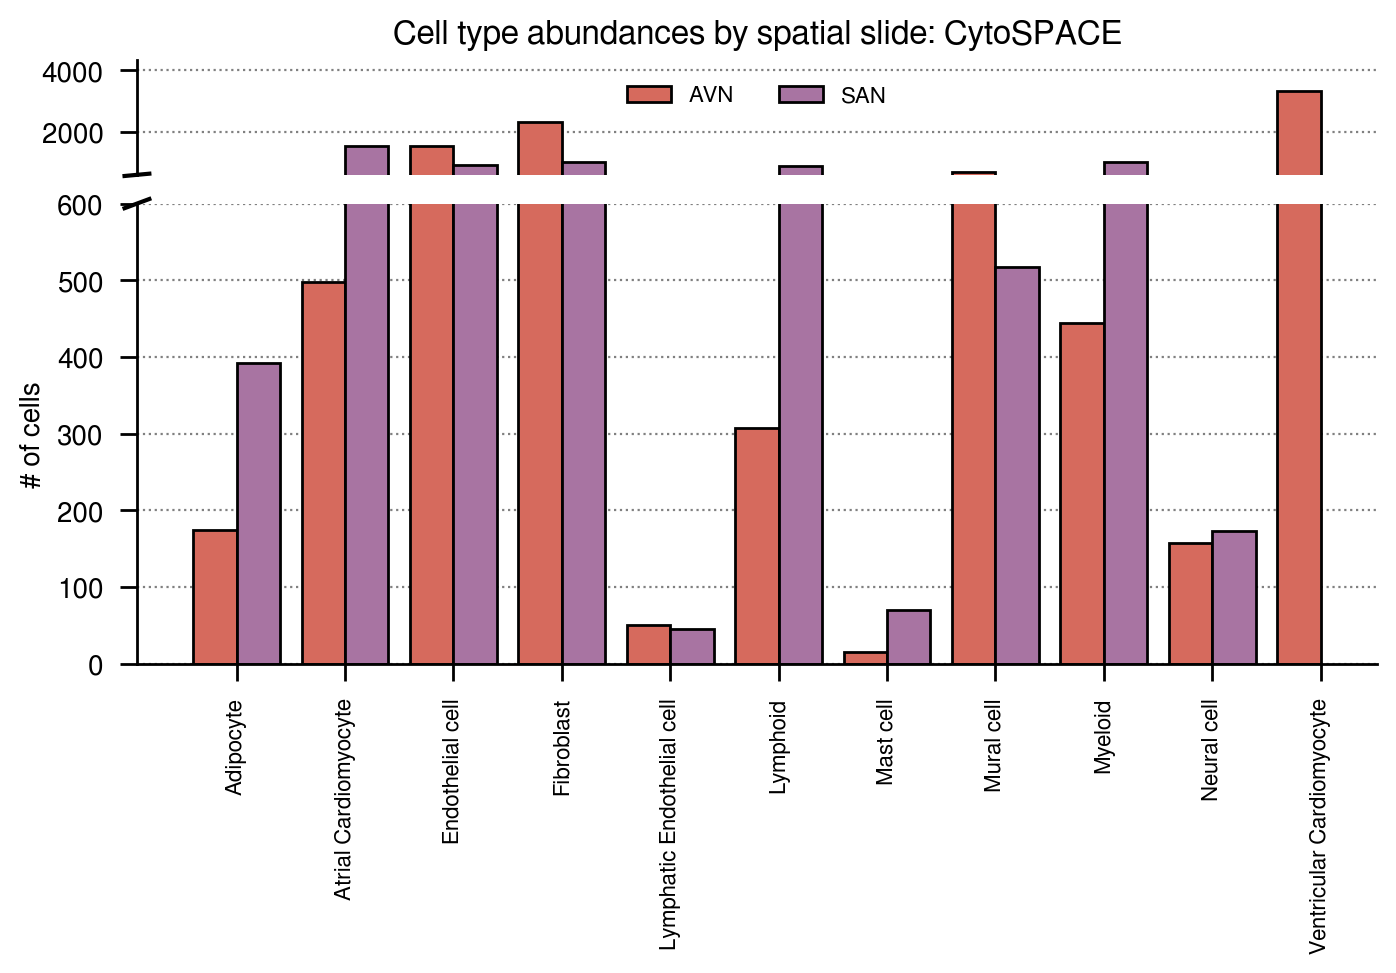

In [13]:
palette =  ['#EA5A49', '#B16BA8']
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 4), dpi=200, gridspec_kw={'height_ratios': [1, 4], 'hspace': 0.1})

# Plot on each subplot
bars_top = sns.barplot(data=df_cell_counts, x='index', y='Count', hue='region', ax=ax, palette=palette, edgecolor='black')
bars_bottom = sns.barplot(data=df_cell_counts, x='index', y='Count', hue='region', ax=ax2, palette=palette, edgecolor='black')

# Set the limits for the y-axis on each subplot to create the break effect
ax.set_ylim(600, df_cell_counts['Count'].max() + 1000)  # Upper part
ax2.set_ylim(0, 600)  # Lower part

## despine function remove the top and right spines from the plot
sns.despine(ax=ax2)
## bottom=True specifies that you want to also remove this spine
sns.despine(ax=ax, bottom=True)

# Adding diagonal lines to indicate the break in axis
d = .01  # How big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

# Adjustments and labels
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', bottom=False)
ax.set_ylabel('')
ax.grid(axis='y', linestyle=':', color='gray', zorder=0)
ax.set_title('Cell type abundances by spatial slide: CytoSPACE', fontsize=title_size)
ax2.legend(title='', loc='upper center',bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False, fontsize=label_size)

ax.legend_.remove()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90, fontsize=label_size)
ax2.set_ylabel('# of cells', fontsize=labelout_size)
ax2.set_xlabel('')
ax2.grid(axis='y', linestyle=':', color='gray', zorder=0)

# Iterate on the different bars and put them on top of the grid
for bar in bars_top.patches:
    bar.set_zorder(2)

for bar in bars_bottom.patches:
    bar.set_zorder(2)
